<a href="https://colab.research.google.com/github/VitaMInkAaA/MAD_laboraturium_Yurii_Vrotnyy/blob/main/projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#Wczytanie danych
import pandas as pd

url = "https://data.cityofchicago.org/resource/ijzp-q8t2.csv"
df = pd.read_csv(url)
print(df.shape)
df.info()
print(df.describe(include='all'))


(1000, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   case_number           1000 non-null   object 
 2   date                  1000 non-null   object 
 3   block                 1000 non-null   object 
 4   iucr                  1000 non-null   object 
 5   primary_type          1000 non-null   object 
 6   description           1000 non-null   object 
 7   location_description  997 non-null    object 
 8   arrest                1000 non-null   bool   
 9   domestic              1000 non-null   bool   
 10  beat                  1000 non-null   int64  
 11  district              1000 non-null   int64  
 12  ward                  1000 non-null   int64  
 13  community_area        1000 non-null   int64  
 14  fbi_code              1000 non-null   object 
 15  x_coordinat

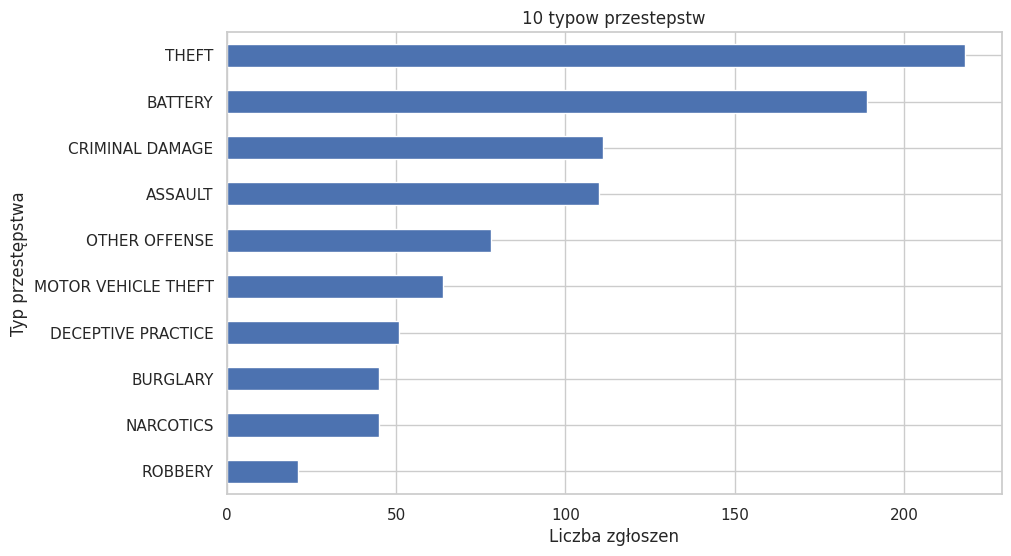

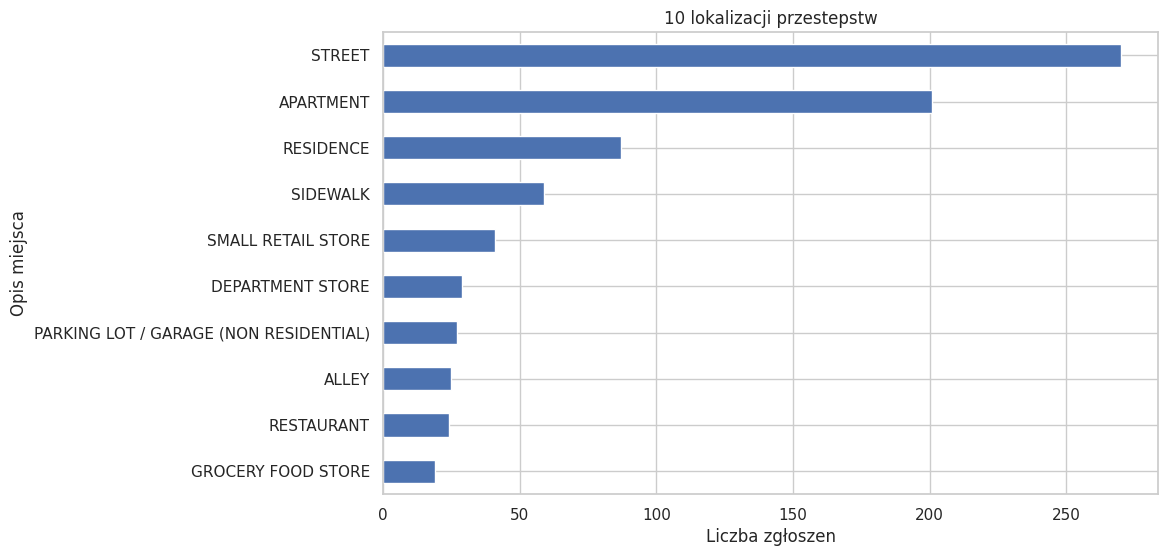

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
#10 typow przestepstw
plt.figure(figsize=(10, 6))
df['primary_type'].value_counts().head(10).plot(kind='barh')
plt.title("10 typow przestepstw")
plt.xlabel("Liczba zgłoszen")
plt.ylabel("Typ przestępstwa")
plt.gca().invert_yaxis()
plt.show()

#10 miejsc przestepstw
plt.figure(figsize=(10, 6))
df['location_description'].value_counts().head(10).plot(kind='barh')
plt.title("10 lokalizacji przestepstw")
plt.xlabel("Liczba zgłoszen")
plt.ylabel("Opis miejsca")
plt.gca().invert_yaxis()
plt.show()


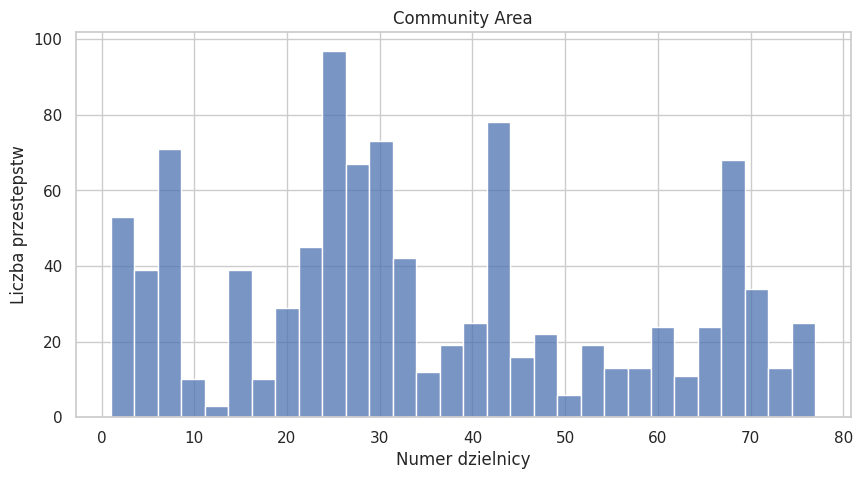

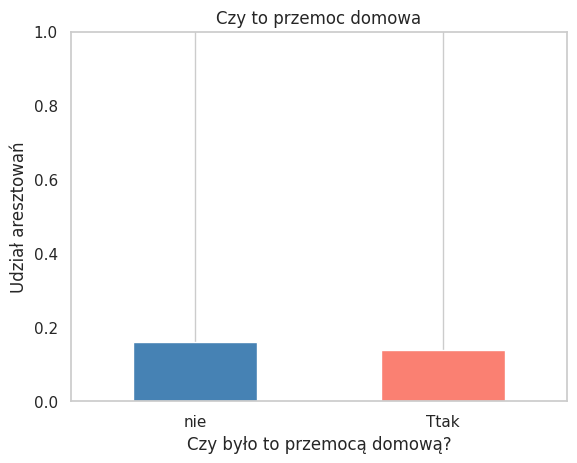

In [17]:
#liczba przypadkow w poszczególnych dzielnicach
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['community_area'].dropna(), bins=30)
plt.title('Community Area')
plt.xlabel('Numer dzielnicy')
plt.ylabel('Liczba przestepstw')
plt.show()

# Czy to przemoc domowa
arrest_by_domestic = df.groupby('domestic')['arrest'].mean()

arrest_by_domestic.plot(kind='bar', color=['steelblue', 'salmon'])
plt.title("Czy to przemoc domowa")
plt.ylabel("Udział aresztowań")
plt.xlabel("Czy było to przemocą domową?")
plt.ylim(0, 1)
plt.xticks([0, 1], ['nie', 'Ttak'], rotation=0)
plt.grid(axis='y')
plt.show()


Braki danych w kazdej kolumnie:

location_description    3
x_coordinate            9
y_coordinate            9
latitude                9
longitude               9
location                9
dtype: int64


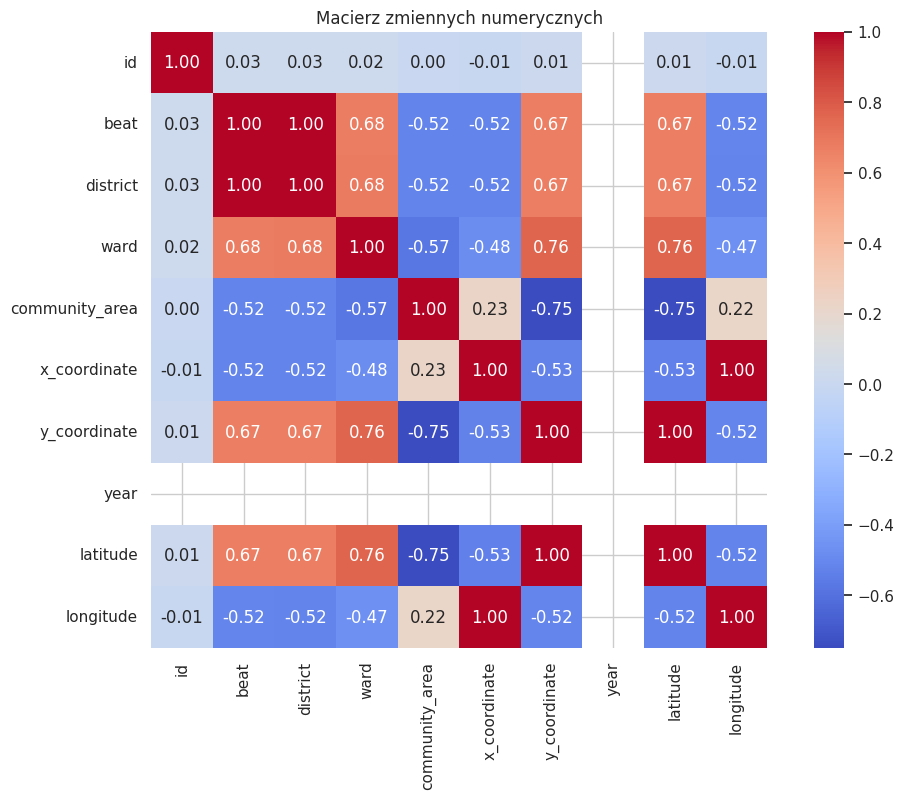

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

#Sprawdzenie braków danych
missing = df.isnull().sum()
print("Braki danych w kazdej kolumnie:\n")
print(missing[missing > 0])


numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Macierz zmiennych numerycznych")
plt.show()


In [19]:
import numpy as np
from scipy import stats

#Usunięcie linijek bez przypisanej dzielnicy
df = df.dropna(subset=['community_area'])

#Wpisywanie UNKNOWN w puste pola
df['location_description'] = df['location_description'].fillna('UNKNOWN')

# Usunięcie duplikatów
df = df.drop_duplicates()

#Usunięcie dzielnic z mniej niż 10 przestępstw
crime_counts = df['community_area'].value_counts()
popular_areas = crime_counts[crime_counts >= 10].index
df = df[df['community_area'].isin(popular_areas)]

#Potwierdzenie po czyszczeniu
print("Liczba wierszy po czyszczeniu:", df.shape[0])


Liczba wierszy po czyszczeniu: 804


In [20]:
#liczba przestępstw w każdej dzielnicy i typ przestępstwa
agg_df = df.groupby(['community_area', 'primary_type']).size().unstack(fill_value=0).reset_index()

#udzial przemocy domowej w danej dzielnicy
domestic_rate = df.groupby('community_area')['domestic'].mean()

# Obliczenie udziału aresztowań w danej dzielnicy
arrest_rate = df.groupby('community_area')['arrest'].mean()

# Dodanie tych udziałów do ramki
agg_df['domestic_rate'] = domestic_rate.values
agg_df['arrest_rate'] = arrest_rate.values

# Utworzenie zmiennej celu łaczna liczba przestępstw w danej dzielnicy
agg_df['total_crimes'] = agg_df.drop(columns=['community_area', 'domestic_rate', 'arrest_rate']).sum(axis=1)

# Podgląd przetworzonych danych
agg_df.head()


primary_type,community_area,ASSAULT,BATTERY,BURGLARY,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,HOMICIDE,INTERFERENCE WITH PUBLIC OFFICER,...,PROSTITUTION,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION,domestic_rate,arrest_rate,total_crimes
0,1,2,6,1,0,0,1,1,0,0,...,0,0,2,0,0,3,0,0.200000,0.250000,20
1,2,0,4,3,3,0,0,1,0,0,...,0,0,0,1,0,1,0,0.200000,0.200000,15
2,3,3,7,0,2,0,0,0,0,0,...,0,0,1,0,0,4,0,0.111111,0.222222,18
3,6,1,4,2,2,0,1,3,0,0,...,0,0,0,0,0,9,0,0.071429,0.000000,28
4,7,0,2,2,1,0,1,2,0,0,...,0,0,0,0,0,7,0,0.000000,0.000000,15


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#zmienna zależna
y = agg_df['total_crimes']

#zmienne niezależne
X = agg_df.drop(columns=['community_area', 'total_crimes'])

# Skalowanie cech
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 80% treningowe 20% testowe
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Informacja o kształcie zbiorów
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Podgląd danych
print("\nPrzykładowe wartości X_train:")
print(X_train[:5])

print("\nPrzykładowe wartości y_train:")
print(y_train[:5].values)


X_train shape: (28, 22)
y_train shape: (28,)
X_test shape: (8, 22)
y_test shape: (8,)

Przykładowe wartości X_train:
[[-0.66779024 -1.28930023 -0.89666544 -0.1959156  -0.28284271 -0.67492637
  -0.06757374 -0.24253563 -0.30151134 -0.42033135 -0.61631563  1.7487658
   0.26726124 -0.16903085 -0.28284271  0.56433265 -0.35355339 -0.16903085
  -0.71910121 -0.49642305  0.1893384  -0.54113404]
 [-0.21419687  1.88436187 -0.04719292  0.3466199  -0.28284271 -0.67492637
  -0.06757374 -0.24253563 -0.30151134  0.33626508  3.08157817 -0.42211588
   1.06904497 -0.16903085  4.80832611 -0.45146612 -0.35355339 -0.16903085
  -0.90669283 -0.49642305  1.46891704  1.35100713]
 [-0.21419687 -0.89259247 -0.89666544 -0.1959156  -0.28284271 -0.67492637
  -0.87845859 -0.24253563 -0.30151134 -0.42033135 -0.61631563 -0.42211588
  -1.33630621 -0.16903085 -0.28284271 -0.45146612 -0.35355339 -0.16903085
   0.21885689 -0.49642305 -1.77924411 -0.66769867]
 [ 0.69298987 -0.09917694  1.65175212  1.43169089 -0.28284271  1.

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

#ternowanie modelu
model = LinearRegression()
model.fit(X_train, y_train)

#testowanie
y_pred = model.predict(X_test)

#wyniki
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


R²: 0.9944
MSE: 1.1250
RMSE: 1.0607


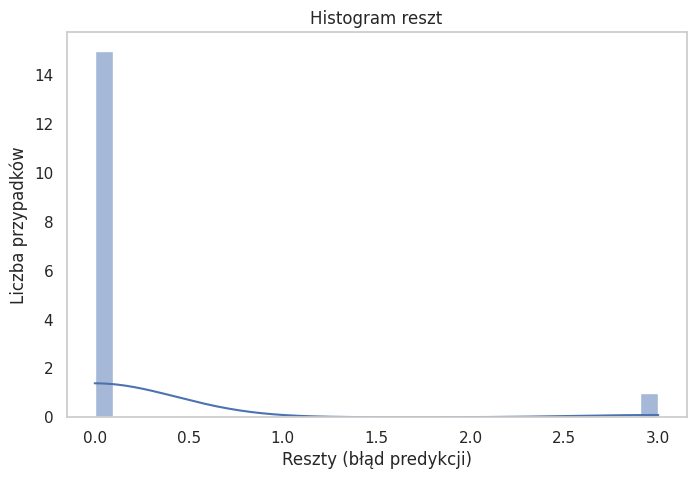

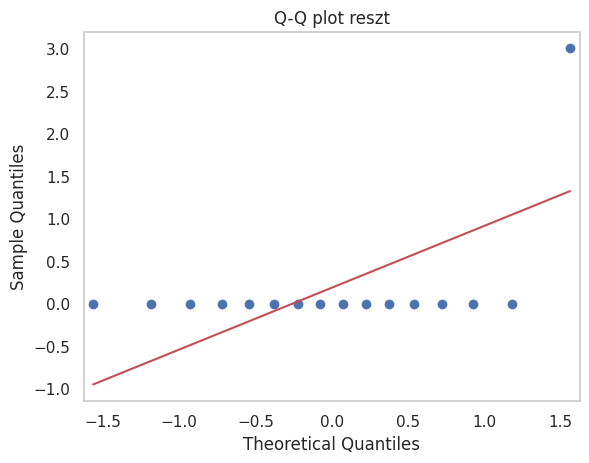

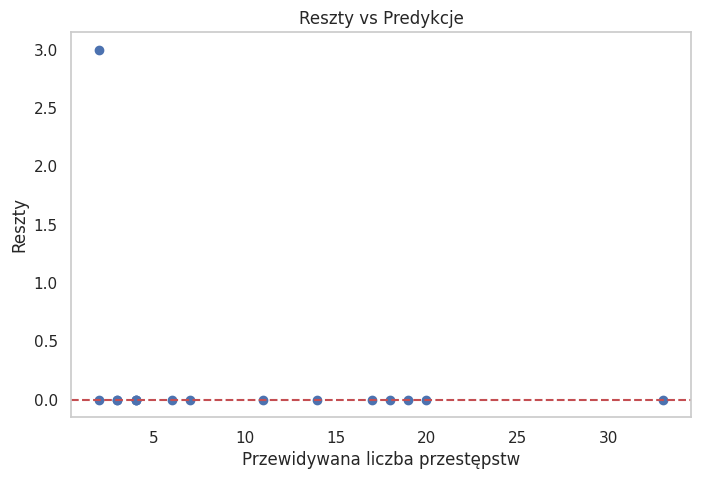

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# roznica miedzy wartoscia rzeczywisna a przewidywana
residuals = (y_test - y_pred).astype(float)


plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("skala blendu")
plt.ylabel("Liczba przypadków")
plt.grid()
plt.show()

# Q-Q plot – sprawdzanie, czy reszty są normalnie rozłożone
sm.qqplot(residuals, line='s')
plt.title("Q-Q plot reszt")
plt.grid()
plt.show()

# Homoscedastyczność – wykres reszt vs. predykcje
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Reszty i Predykcje")
plt.xlabel("Przewidywana liczba przestępstw")
plt.ylabel("Reszty")
plt.grid()
plt.show()
